In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
hci_data=pd.read_excel(r'HCI_Datasheet.csv')

In [3]:
hci_data=hci_data.drop(columns=['S. No','Decision Date','Application Date'])
hci_data['University_Program']=hci_data.University+' '+hci_data.Programme
hci_data.University=hci_data.University_Program
hci_data=hci_data.drop(columns=['Programme','University_Program','Year of Entry'])

#Label Encoding 

le = preprocessing.LabelEncoder()

hci_data['Decision'] = le.fit_transform(hci_data['Decision']) ### 0-Accepted, 1-Rejected
hci_data['Research Experience'] = le.fit_transform(hci_data['Research Experience']) ###1-Yes, 0-No
hci_data['Submitted Portfolio'] = le.fit_transform(hci_data['Submitted Portfolio']) ###1-Yes, 0-No
hci_data['Student Status'] = le.fit_transform(hci_data['Student Status']) ### 0-Domestic, 1-International, 2-Undergrad domestic

hci_data['GRE']=hci_data['GRE'].fillna(330)
hci_data['TOEFL']=hci_data['TOEFL'].fillna(120)

In [4]:
hci_data.head()

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Georgia Tech MS HCI,1,3.8,330.0,117.0,1.0,1,2,1,1,52,38,70
1,Georgia Tech MS HCI,1,3.5,330.0,112.0,4.0,1,6,1,1,52,38,70
2,Georgia Tech MS HCI,1,3.2,330.0,120.0,2.0,1,0,1,0,52,38,70
3,Georgia Tech MS HCI,1,2.7,320.0,113.0,1.5,0,0,1,1,52,38,70
4,Georgia Tech MS HCI,1,3.6,320.0,120.0,1.0,0,0,1,2,52,38,70


## CTGAN Synthesizer

In [5]:
from ctgan import CTGANSynthesizer

In [6]:
columns=list(hci_data.columns)
columns

['University',
 'Decision',
 'CGPA',
 'GRE',
 'TOEFL',
 'Work Experience',
 'Research Experience',
 'Research Papers',
 'Submitted Portfolio',
 'Student Status',
 'Class Size',
 'THE Rank',
 'QS Rank']

In [7]:
ctgan = CTGANSynthesizer(epochs=100)
ctgan.fit(hci_data, columns)

In [8]:
synthetic_data = ctgan.sample(50)
synthetic_data[:10]

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,University of Texas Austin MSIS,0,3.96,283.0,99.0,1.5,1,0,0,1,45,38,67
1,Indiana University Purdue MS HCI,0,3.80,324.0,120.0,2.5,1,0,1,1,25,22,67
2,University of Washington MS HCDE,1,3.59,330.0,120.0,0.5,0,0,0,0,35,650,67
3,University of Texas Austin MSIS,1,3.86,330.0,120.0,8.0,1,0,1,0,45,38,152
4,University of Washington MHCID,0,3.21,330.0,109.0,2.0,0,0,1,0,45,29,67
5,University of Washington MS HCDE,1,3.46,330.0,120.0,1.0,0,0,1,0,25,227,51
6,University of Texas Austin MSIS,0,3.40,316.0,120.0,0.0,1,1,1,1,122,227,115
7,Rochester Institute MS HCI,0,3.82,323.0,110.0,1.5,0,0,0,1,52,90,67
8,University of Michigan MSI,0,3.50,317.0,120.0,5.0,0,0,1,1,52,29,51
9,Georgia Tech MS HCI,1,3.30,330.0,93.0,0.5,1,0,0,1,25,38,72


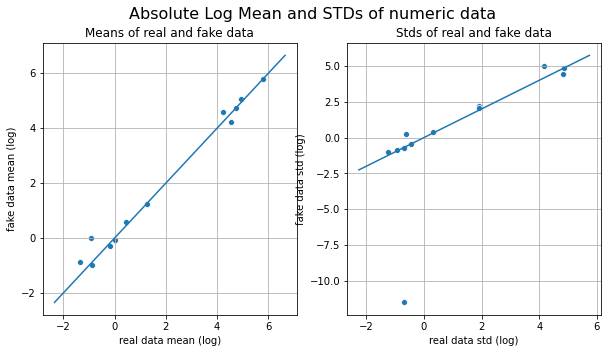

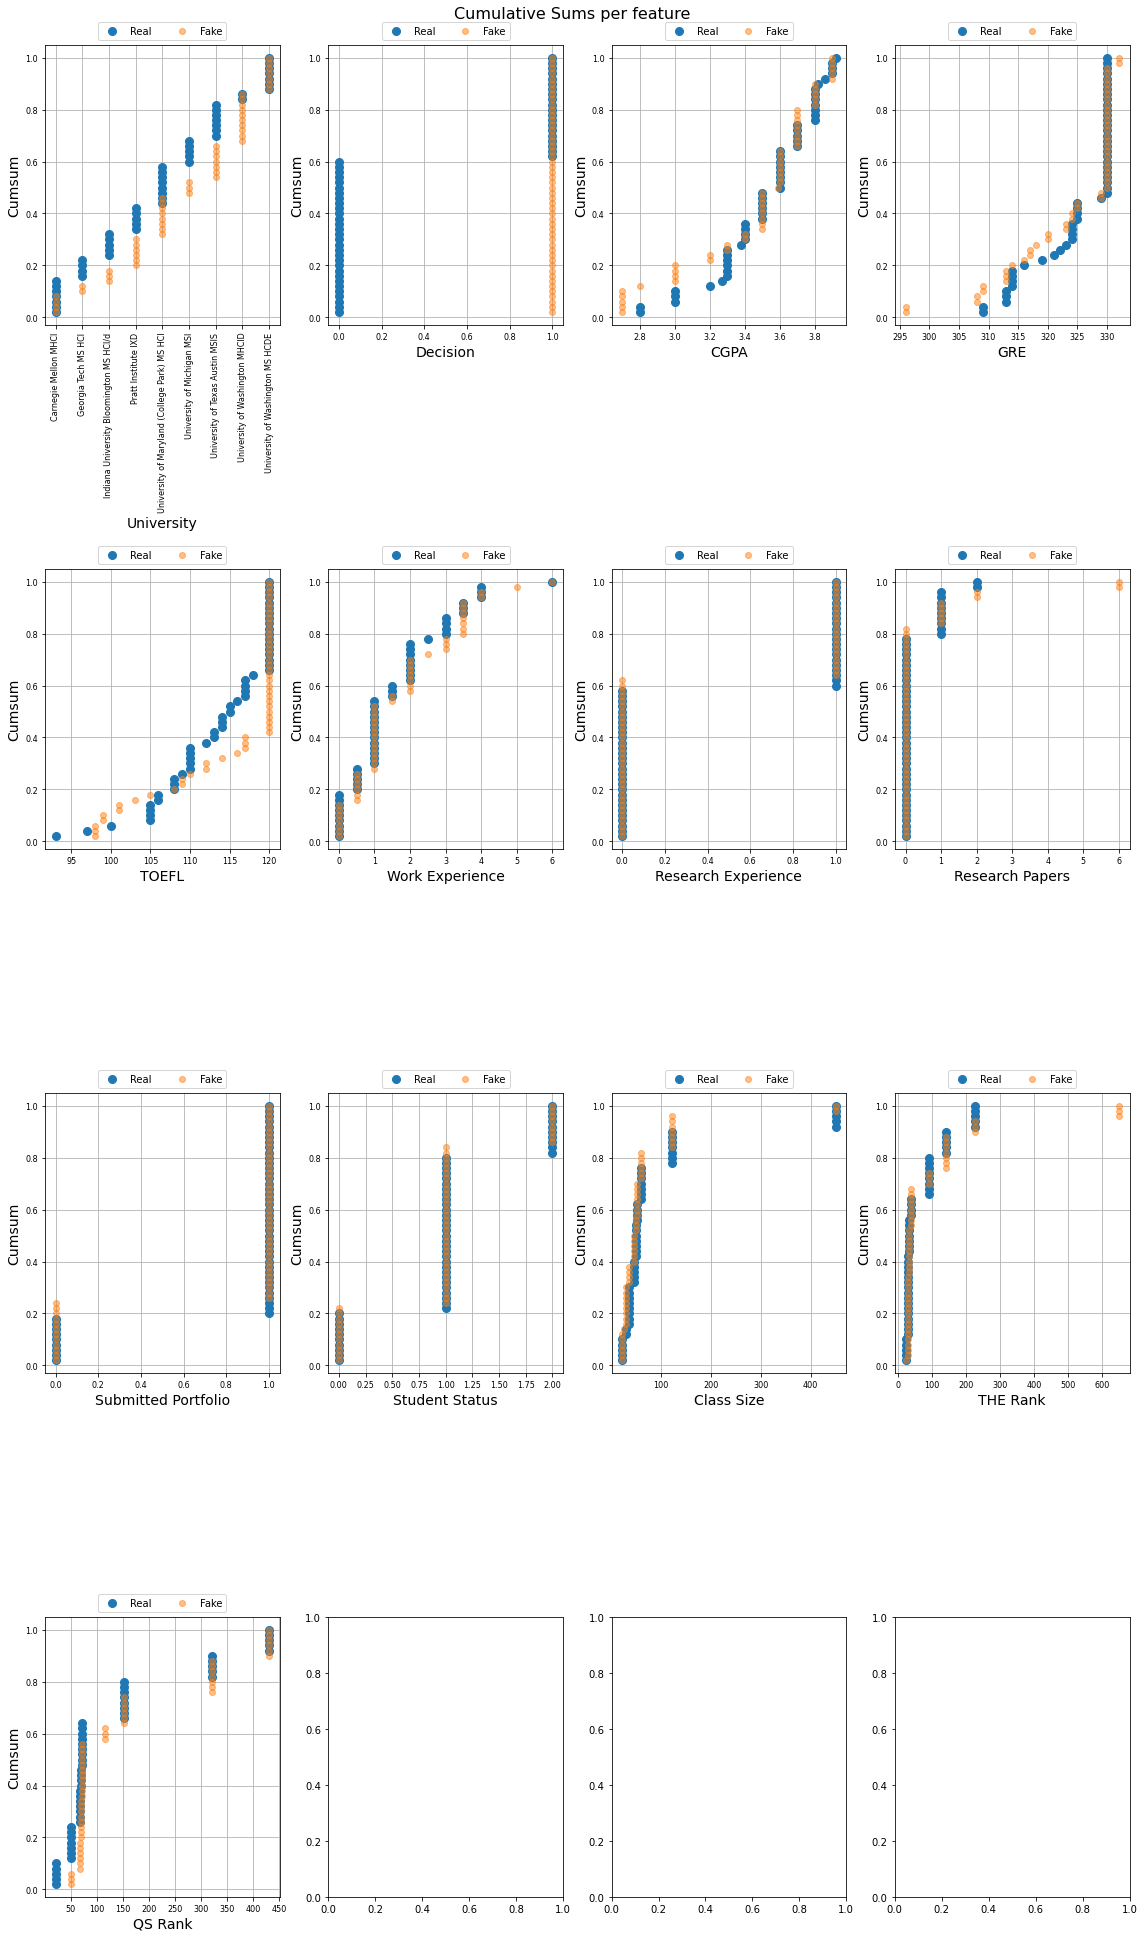

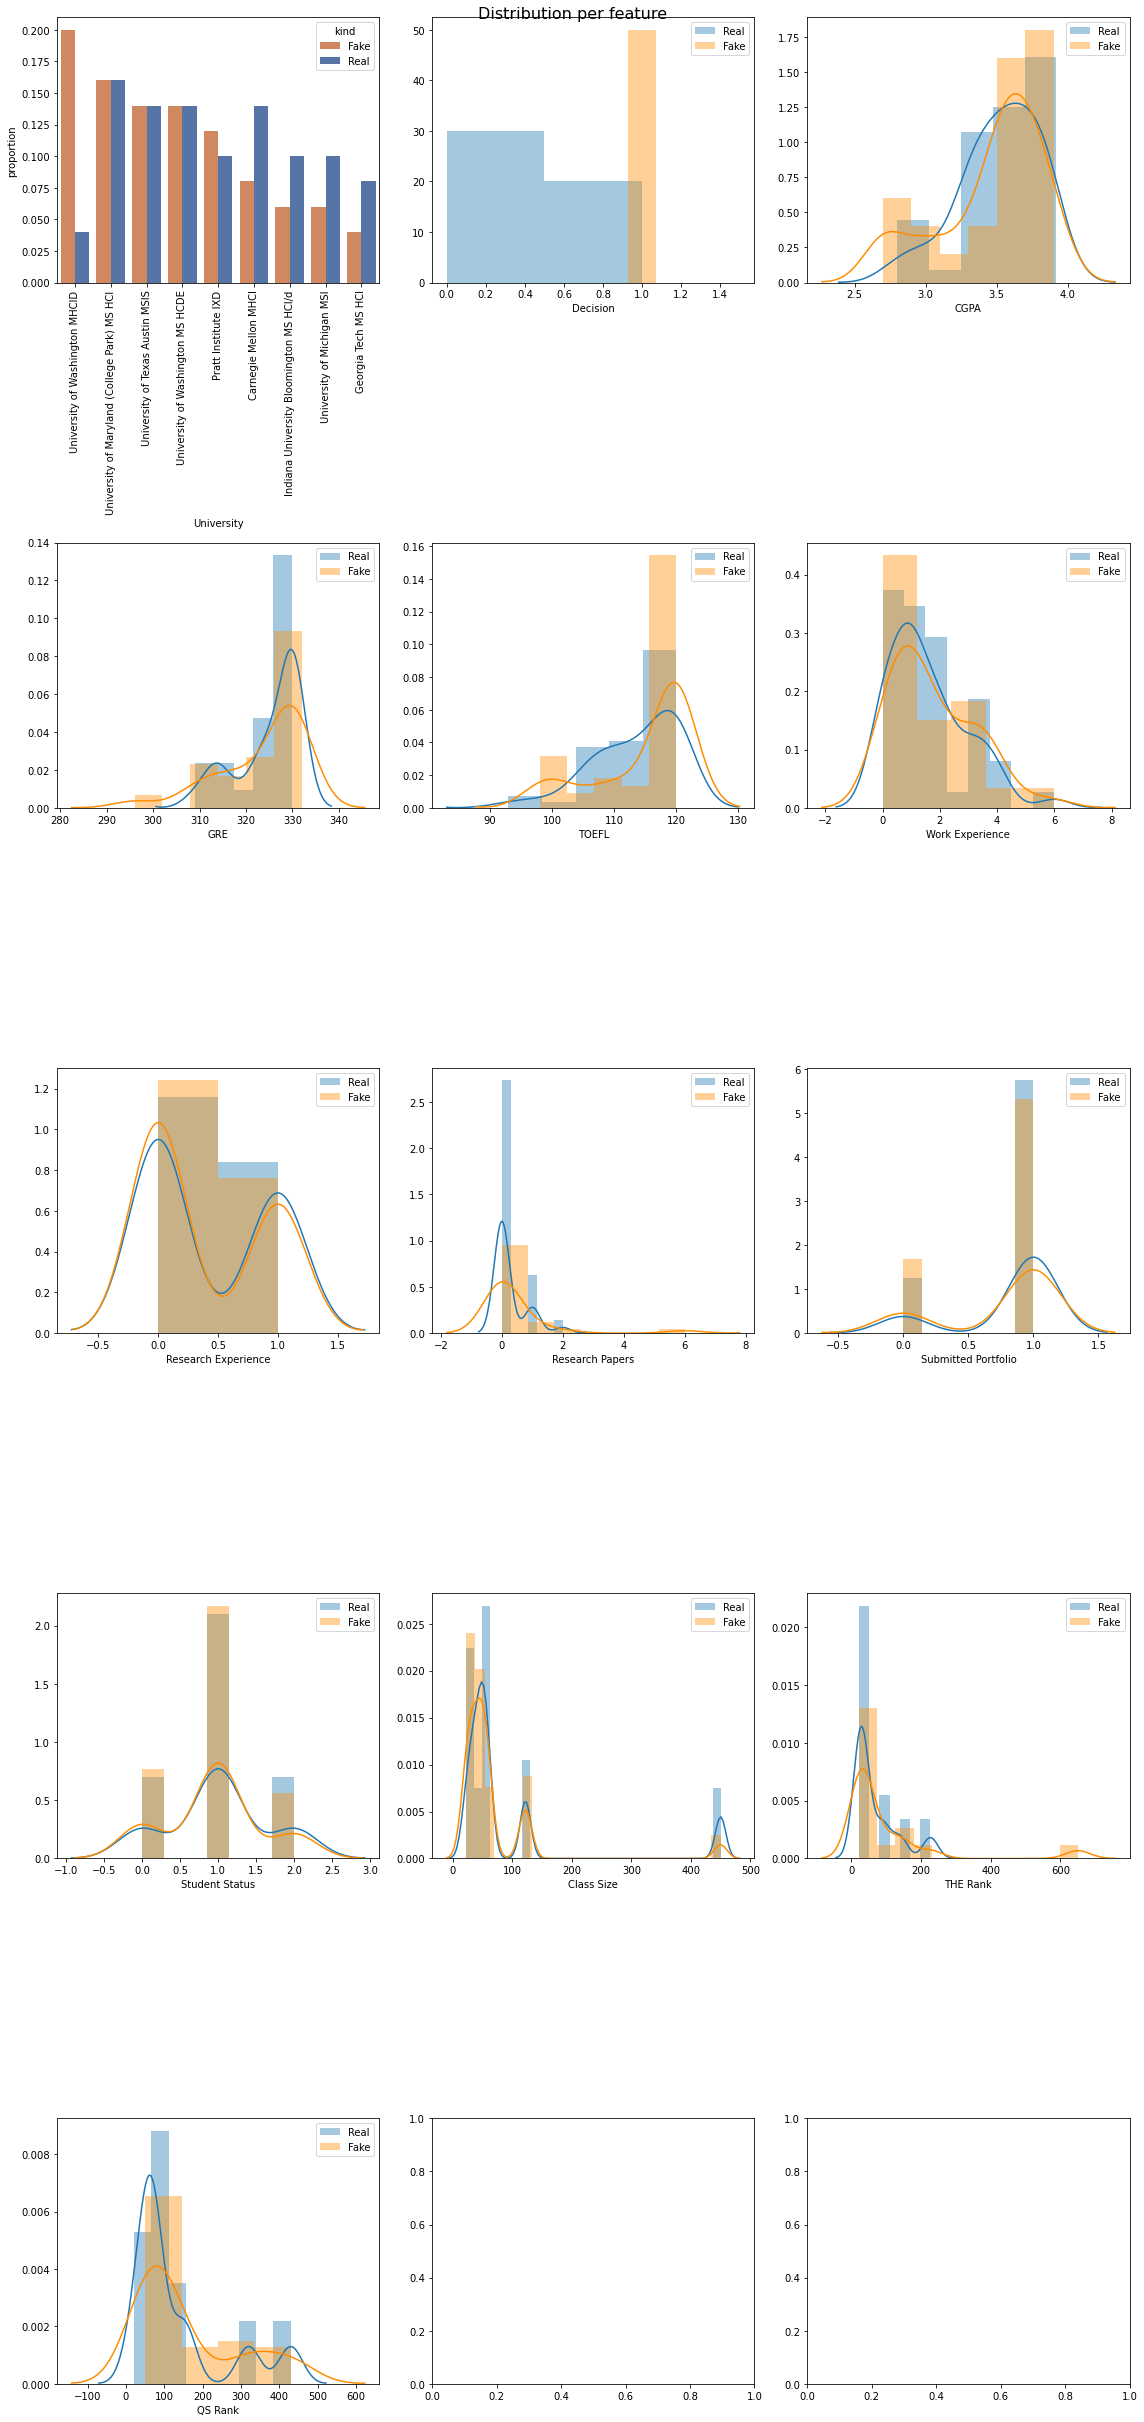

In [20]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(hci_data, synthetic_data)
try:
    table_evaluator.visual_evaluation()
except:
    print()

In [10]:
from sdv.evaluation import evaluate
evaluate(synthetic_data, hci_data,metrics=['CSTest', 'LogisticDetection'])

0.9389407417813236

In [11]:
hci_data.describe()

,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.436508,3.501706,323.515873,111.523810,1.658730,0.436508,0.253968,0.793651,0.865079,79.511905,112.242063,160.416667
std,0.496939,0.305213,8.688715,10.784166,1.610042,0.496939,0.718969,0.405489,0.603485,106.563281,165.225865,171.493153
min,0.000000,2.400000,283.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,22.000000,21.000000
25%,0.000000,3.300000,319.000000,106.000000,0.500000,0.000000,0.000000,1.000000,0.000000,35.000000,29.000000,67.000000
50%,0.000000,3.600000,329.000000,114.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,38.000000,72.000000
75%,1.000000,3.700000,330.000000,120.000000,2.500000,1.000000,0.000000,1.000000,1.000000,60.000000,140.000000,152.000000
max,1.000000,3.980000,335.000000,120.000000,8.000000,1.000000,6.000000,1.000000,2.000000,450.000000,650.000000,760.000000


In [12]:
synthetic_data.describe()

,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.460000,3.476200,327.160000,111.260000,1.810000,0.520000,0.160000,0.720000,0.740000,84.580000,110.620000,152.580000
std,0.503457,0.297252,8.357717,16.997971,1.622199,0.504672,0.370328,0.453557,0.632778,112.394547,153.382394,152.797063
min,0.000000,2.700000,283.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,22.000000,21.000000
25%,0.000000,3.300000,330.000000,105.250000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,29.000000,70.000000
50%,0.000000,3.500000,330.000000,120.000000,1.250000,1.000000,0.000000,1.000000,1.000000,50.000000,38.000000,72.000000
75%,1.000000,3.775000,330.000000,120.000000,2.375000,1.000000,0.000000,1.000000,1.000000,60.000000,140.000000,152.000000
max,1.000000,3.960000,335.000000,120.000000,8.000000,1.000000,1.000000,1.000000,2.000000,450.000000,650.000000,760.000000


### CTGAN for only rejects

In [13]:
rejects_data=hci_data.query('Decision==1')
rejects_data

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Georgia Tech MS HCI,1,3.8,330.0,117.0,1.0,1,2,1,1,52,38,70
1,Georgia Tech MS HCI,1,3.5,330.0,112.0,4.0,1,6,1,1,52,38,70
2,Georgia Tech MS HCI,1,3.2,330.0,120.0,2.0,1,0,1,0,52,38,70
3,Georgia Tech MS HCI,1,2.7,320.0,113.0,1.5,0,0,1,1,52,38,70
4,Georgia Tech MS HCI,1,3.6,320.0,120.0,1.0,0,0,1,2,52,38,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Carnegie Mellon MHCI,1,3.7,332.0,115.0,0.0,1,0,1,1,60,28,51
241,Carnegie Mellon MHCI,1,3.2,283.0,95.0,1.5,0,0,1,1,60,28,51
242,Carnegie Mellon MHCI,1,3.2,308.0,104.0,3.5,0,0,1,1,60,28,51
243,Carnegie Mellon MHCI,1,3.8,325.0,114.0,0.5,0,0,1,1,60,28,51


In [14]:
from ctgan import CTGANSynthesizer
columns=list(rejects_data.columns)

In [15]:
ctgan = CTGANSynthesizer(epochs=100)
ctgan.fit(rejects_data, columns)

In [16]:
synthetic_data = ctgan.sample(50)
synthetic_data.head()

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Carnegie Mellon MHCI,1,3.50,330.0,120.0,1.5,1,0,1,1,52,29,51
1,University of Washington MHCID,1,3.50,323.0,99.0,1.0,0,0,1,0,50,650,72
2,University of Maryland (College Park) MS HCI,1,3.59,313.0,101.0,3.5,0,1,1,1,30,140,70
3,University of Texas Austin MSIS,1,3.80,317.0,120.0,3.5,0,0,0,2,22,31,70
4,University of Texas Austin MSIS,1,3.90,308.0,117.0,4.0,0,0,1,1,52,28,115


In [17]:
from sdv.evaluation import evaluate
evaluate(synthetic_data, rejects_data,metrics=['CSTest', 'LogisticDetection'])

0.990195831201194

In [21]:
synthetic_data.to_csv("C:/Users/snigd/OneDrive/Documents/Rejects_CTGAN.csv")

## CopulaGAN

In [21]:
hci_data.head()

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Georgia Tech MS HCI,1,3.8,330.0,117.0,1.0,1,2,1,1,52,38,70
1,Georgia Tech MS HCI,1,3.5,330.0,112.0,4.0,1,6,1,1,52,38,70
2,Georgia Tech MS HCI,1,3.2,330.0,120.0,2.0,1,0,1,0,52,38,70
3,Georgia Tech MS HCI,1,2.7,320.0,113.0,1.5,0,0,1,1,52,38,70
4,Georgia Tech MS HCI,1,3.6,320.0,120.0,1.0,0,0,1,2,52,38,70


In [22]:
from sdv.tabular import CopulaGAN
model = CopulaGAN()
model.fit(hci_data)

D:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
D:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\snigd\AppData\Roaming\Python\Python37\site-packages\copulas\univariate\truncated_gaussian.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
C:\Users\snigd\AppData\Roaming\Python\Python37\site-packages\copulas\univariate\tru

In [47]:
new_data = model.sample(1000)
new_data.head()

,University,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
0,Indiana University Bloomington MS HCI/d,0,3.6873,328.9363,100.4682,6.1020,1,0,1,0,587,35,53
1,University of Texas Austin MSIS,0,3.2596,298.8943,115.5541,-0.3303,1,0,1,1,59,35,93
2,University of Texas Austin MSIS,0,3.1368,330.0292,97.6732,0.2370,0,0,1,1,40,28,77
3,Carnegie Mellon MHCI,0,3.5642,330.9400,101.9322,0.0901,1,0,0,1,47,34,88
4,University of Washington MHCID,1,3.7234,313.9814,121.3873,0.7734,1,0,0,2,44,77,46


In [48]:
from sdv.evaluation import evaluate
evaluate(new_data, hci_data,metrics=['CSTest', 'LogisticDetection'])

0.7468227423317193

In [58]:
hci_data.describe()

,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
count,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000,252.0000
mean,0.4365,3.5017,323.5159,111.6667,1.6587,0.4365,0.2540,0.7937,0.8651,79.5119,112.2421,160.4167
std,0.4969,0.3052,8.6887,11.0652,1.6100,0.4969,0.7190,0.4055,0.6035,106.5633,165.2259,171.4932
min,0.0000,2.4000,283.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22.0000,22.0000,21.0000
25%,0.0000,3.3000,319.0000,106.0000,0.5000,0.0000,0.0000,1.0000,0.0000,35.0000,29.0000,67.0000
50%,0.0000,3.6000,329.0000,114.0000,1.0000,0.0000,0.0000,1.0000,1.0000,50.0000,38.0000,72.0000
75%,1.0000,3.7000,330.0000,120.0000,2.5000,1.0000,0.0000,1.0000,1.0000,60.0000,140.0000,152.0000
max,1.0000,3.9800,335.0000,151.0000,8.0000,1.0000,6.0000,1.0000,2.0000,450.0000,650.0000,760.0000


In [57]:
new_data.describe()

,Decision,CGPA,GRE,TOEFL,Work Experience,Research Experience,Research Papers,Submitted Portfolio,Student Status,Class Size,THE Rank,QS Rank
count,"1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000"
mean,0.5130,3.5048,322.5550,112.0720,0.8625,0.5760,0.0530,0.5850,0.6340,198.4690,135.2910,139.4360
std,0.5001,0.4332,9.6996,10.5524,1.4985,0.4944,0.2725,0.4930,0.6546,"1,052.2900",262.6240,188.1620
min,0.0000,0.2271,291.7434,81.9507,-1.7926,0.0000,0.0000,0.0000,0.0000,-12.0000,22.0000,21.0000
25%,0.0000,3.3803,316.8031,104.1891,-0.0042,0.0000,0.0000,0.0000,0.0000,41.0000,28.0000,55.0000
50%,1.0000,3.5861,327.7373,116.1777,0.6175,1.0000,0.0000,1.0000,1.0000,52.0000,39.0000,74.0000
75%,1.0000,3.7630,329.9042,120.0818,1.3487,1.0000,0.0000,1.0000,1.0000,76.0000,114.2500,102.0000
max,1.0000,4.3376,333.5823,133.2437,12.7904,1.0000,3.0000,1.0000,2.0000,"19,105.0000","2,311.0000","1,190.0000"


### Getting negative values for work experience, since gaussian curve fit around multiple cases where work exp=0
### Rank and Scores also highly inflated 